<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Week 4 Lecture 2</div>
<div style="text-align: right">Dino Konstantopoulos, 29 September 2022, with material from Cam Davidson-Pilon</div>

* * * 
*At the end of this lecture, you should a good understanding of probability distributions, how to estimate probabilities for different outcomes and sample spaces, how to use Bayes' theorem to answer typical interview questions involving probabilities, and start thinking about finding a job in high-stakes sports!*

*For next week, reading homework: Chapter 6 of your textbook, Mathematics for Machine Learning*.

# Homework solution

 Determine the probability that the sum of a three-dice roll is prime:
 
<center>
<img src="ipynb.images/3-dice-roll.png" width="200" />
</center>

In [1]:
from fractions import Fraction
def p(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes.
    event can be either a set of outcomes, or a predicate (true for outcomes in the event)."""
    if is_predicate(event):
        event = such_that(event, space)
    return Fraction(len(event & space), len(space))

is_predicate = callable

def such_that(predicate, collection): 
    """The subset of elements in the collection for which the predicate is true."""
    return {e for e in collection if predicate(e)}

In [2]:
D = {1,2,3,4,5,6}

In [3]:
D3 = {(d1, d2, d3) for d1 in D for d2 in D for d3 in D}

In [5]:
D3

{(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 4, 6),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (1, 5, 6),
 (1, 6, 1),
 (1, 6, 2),
 (1, 6, 3),
 (1, 6, 4),
 (1, 6, 5),
 (1, 6, 6),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 2, 5),
 (2, 2, 6),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 3, 5),
 (2, 3, 6),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (2, 4, 5),
 (2, 4, 6),
 (2, 5, 1),
 (2, 5, 2),
 (2, 5, 3),
 (2, 5, 4),
 (2, 5, 5),
 (2, 5, 6),
 (2, 6, 1),
 (2, 6, 2),
 (2, 6, 3),
 (2, 6, 4),
 (2, 6, 5),
 (2, 6, 6),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (3, 2, 5),
 (3,

In [4]:
def prime_sum(outcome): return is_prime(sum(outcome))

Dua Lipa prime code:

In [9]:
def is_prime(n): return ...

In [10]:
p(prime_sum, D3)

Fraction(1, 1)

# Introduction to Probability Distributions

Your textbook, in page 6, states that the foundations of Machine Learning are:

<center>
<img src="ipynb.images/foundations-of-ML.png" width="500" />
</center>


## The Binomial distribution
And so let's start with a little lab that introduces a very important probability distribution: The [binomial](https://en.wikipedia.org/wiki/Binomial_distribution). We will get to know other important distributions in class throughout the semester (and of course you already know about that beautiful distribution: The Gaussian or *normal* distribution). The binomial looks a bit like the Gaussian, but if you look closely, the "*bell*" has a different shape.

<br />
<center>
<img src="http://statistics.wdfiles.com/local--files/ch6/binomial.png" width="400" />
Binomial
</center>

>**Definition**: The binomial distribution with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $n$ *independent* experiments, each asking a yes–no question, and each with its own boolean-valued outcome: success/yes/true/one (with probability $p$) or failure/no/false/zero (with probability $q = 1 − p$).

> If the random variable X follows the binomial distribution with parameters n ∈ ℕ and p ∈ [0,1], we write X ~ B(n, p). The probability of getting exactly k successes in n independent Bernoulli trials is given by the **probability mass function**: $$f(k) = {n \choose k} p^{k} (1-p)^{n-k}$$

>where $\binom {n}{k}$ is our famous ***choose*** function from previous lecture: $${n \choose k} = \frac{n!}{k!(n-k)!}$$

>The formula can be understood as follows: $k$ successes occur with probability $p^k$ and $n − k$ failures occur with probability $(1 − p)^{n − k}$. However, the $k$ successes can occur *anywhere* among the $n$ trials, and there are $\binom {n}{k}$ different ways of distributing $k$ successes in a sequence of $n$ trials, just like there are $\binom {23}{6}$ different ways of selecting 6 balls from an urn of 23.

>**Example**: Suppose a **biased** coin comes up heads with probability 0.3 when tossed. The probability of seeing exactly 4 heads in 6 tosses is:

>$$f(4, 6, 0.3) = {6 \choose 4} 0.3^{4} (1 - 0.3)^{6 - 4} = 0.06$$

First, let's plot a few binomial distributions:

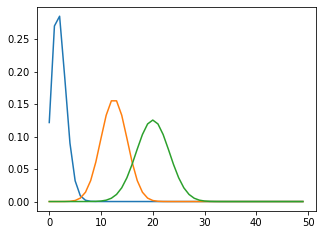

In [11]:
# n and p are exactly as defined above
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt
%matplotlib inline

n_values = [20, 25, 40]
p_values = [0.1, 0.5, 0.5]
x = np.arange(0, 50)    

fig, ax = plt.subplots(figsize=(5, 3.75))

for (n, p) in zip(n_values, p_values):
    # create a binomial distribution
    dist = binom(n, p)

    plt.plot(x, dist.pmf(x))

Let's generate some **random variates** and plot their **histogram** to verify:

[16 16 17 17 15 13 18 15 18 19 14 18 10 15 16 13 18 14 17 15 17 17 17 20
 16 17 15 18 13 18 16 15 15 18 15 17 15 18 17 16 14 17 15 15 16 14 15 19
 18 16 15 16 16 15 13 16 15 15 15 15 16 17 16 15 17 18 17 17 16 15 18 18
 16 13 17 15 16 18 13 16 18 18 15 17 16 18 14 12 14 17 16 17 17 15 18 17
 16 17 19 17]


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

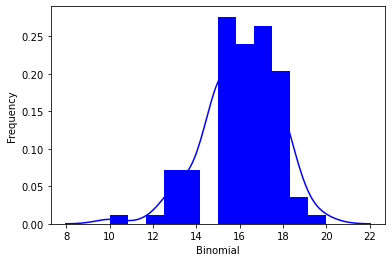

In [12]:
import seaborn as sb, numpy as np
from scipy.stats import binom
#data_binom =binom.rvs(size=10,n=20,p=0.8)
data_binom = binom.rvs(n=20,p=0.8,loc=0,size=100)
print(data_binom)
ax = sb.distplot(data_binom,kde=True,color='blue',hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

### Approximations

If you think the binomial *looks* like a bell curve, it does!

If $n$ is large enough and the skew $p$ of the distribution is not too great (not too close to 0 or too close to 1), then a reasonable approximation to B(n, p) is given by a **normal distribution**!. In fact, it can be proven that it is close to:

$$N(np, np(1-p))$$

if both values $np$ and $n(1-p)$ are greater than or equal to 5. This approximation, known as de Moivre–Laplace theorem, is a huge time-saver when undertaking calculations by hand (exact calculations with large n are very onerous). Historically, it was the first use of the normal distribution, introduced in Abraham de Moivre's book *The Doctrine of Chances* in 1738.

The binomial distribution also converges towards another distribution that we have not seen yet: the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution), as the number of trials goes to infinity while the product $np$ remains fixed or at least $p$ tends to zero. Therefore, the Poisson distribution with parameter $λ = np$ can be used as an approximation to B(n, p) if $n$ is sufficiently large and $p$ is sufficiently small. According to two rules of thumb, this approximation is good if $n ≥ 20$ and $p ≤ 0.05$, or if $n ≥ 100$ and $np ≤ 10$.

# Data Science with Danish Children
So far, we have made the assumption that every outcome in a sample space (urn) is equally likely. In real life, we often get outcomes that are not equiprobable. For example, the probability of a child being a girl is not exactly 1/2, and the probability is slightly different for a second child. 

An [article](http://people.kzoo.edu/barth/math105/moreboys.pdf) (good Data Science article, you should read it) gives the following *counts* for two-child families in Denmark, where `GB` means a family where the first child is a girl and the second a boy:

    GG: 121801    GB: 126840
    BG: 127123    BB: 135138
    
How to work our `p` function with such distributions? We'll answer this question in this notebook!

### A bit of Python-fu

Now, let's digress a bit into abstract computer science..

In Python, `*args` and `**kwargs` is a common idiom to allow ***arbitrary number of arguments*** to functions. `*args` will give you all function parameters as a tuple, `**kwargs` will give you all keyword arguments (except those corresponding to a formal parameter) as a dictionary:
```python
def foo(*args):
    for a in args:
    print a
        
def bar(**kwargs):
    for a in kwargs:
        print a, kwargs[a]
```

Let’s say we want to create a higher-order function that takes as input some function $f$ and returns a new function that for any input returns *twice* the value of $f$:

In [13]:
def my_doubler(f):
    def my_g(x):
        return 2 * f(x)
    return my_g

It works.. in most cases:

In [14]:
def f_plus_1(x):
    return x + 1;

h = my_doubler(f_plus_1)
print(h(3)) #(3+1) * 2

8


Now try this:

In [15]:
def my_sum2(x, y):
    return x + y;

h = my_doubler(my_sum2)
print(h(1,2))

TypeError: my_g() takes 1 positional argument but 2 were given

Oh *nooooo*!

What we need is a way to specify a function that takes *arbitrary arguments*. This is where Python's `*args` and `**kwargs` come into play:

In [16]:
def magic(*args, **kwargs):
    print ("unnamed args: ", args)
    print ("keyword args: ", kwargs)
magic(1, 2, 3, 4, key1 = 'NU', key2 = 'rocks!', key3 = 'really!')

unnamed args:  (1, 2, 3, 4)
keyword args:  {'key1': 'NU', 'key2': 'rocks!', 'key3': 'really!'}


<br />
<center>
    <img src="ipynb.images/magic.png" width=300 />**Ohhhhhhhhhhhh**</a><br>
</center>

args is a `tuple` of its unnamed arguments and kwargs is a `dictionary` of its named arguments. So now we can:

In [17]:
def my_new_doubler(f):
    """works no matter the inputs"""
    def my_g(*args, **kwargs):
        return 2 * f(*args, **kwargs)
    return my_g

and now:

In [18]:
h = my_new_doubler(my_sum2)
print(h(1, 2))  # 6:

6


Ok, ***now*** are ready to define **Probability distributions** in python, our new ***p*** function, where each outcome on the x-axis has its own distinct probability of being picked: One (high) value for rock star, one (low) value for Dino for the outcome of marrying Dua Lipa.

>**Guess**: What python data structure are we likely to use to define probability distributions?

We define `ProbDist` to take the same kinds of arguments that a `dict` does: either a **mapping** (from item to its probability) or a **set** of (key, val) pairs, and/or optional keyword arguments (because each ball in the urn is *special* now: it has its *own* probability of being picked). 

>**A dose of reality**: It's like all boys/girls are not equal! You will not just pick any boy/girl to be your girl/boyfriend! There are some that have a *much higher chance* of being picked by you (related to *your* taste)!

This is the first time (in class), that we will define a Python `class`, instead of a Python **function/lambda**. That is why we will define its **constructor** `__init__()`. We assume `self` (`this` in Python) is composed of a set:

In [27]:
class ProbDist(dict):
    """A Probability Distribution; an {outcome: probability} mapping."""
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        # Make probabilities sum to 1.0; assert no negative probabilities
        total = sum(self.values())
        for outcome in self:
            self[outcome] = self[outcome] / total
            assert self[outcome] >= 0

We also need to modify the functions `p` and `such_that` to accept either a sample space as we had previously, or a probability distribution as the second argument `space`. 

>**Oh-oh**: Now we need to branch out on the ***2nd argument*** of function `p`!

If we have a probability distribution, instead of *counting* each possible outcome equiprobably and thus just summing up `1`s (numerator: sum of all *favorable* outcomes, denominator: sum of all *possible* outcomes), we need to sum up the different discrete probabilities of each possible outcome: `sum(space[o] for o in space if o in event)`. 

We also need to modify `such_that()`, which is the set of all outcomes of our sample space for which the predicate (first) argument is `True`, so that its second argument can also be a `ProbDist`.

In [28]:
def p(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes. 
    event: a collection of outcomes, or a predicate that is true of outcomes in the event. 
    space: a set of outcomes or a probability distribution of {outcome: frequency} pairs."""
    # branch on the type of the first argument
    if is_predicate(event):
        # transform the mapping (untangible) 'event' into the collection (tangible) 'event'
        event = such_that(event, space)
        
    if isinstance(space, ProbDist):
        # if space is a dictionary of distinct probabilities, where each item does not count as the same amount
        return sum({space[]})
    else:
        # space is not a dictionary but a collection, let's fall back to our original division
        return Fraction(len(event & space), len(space))

is_predicate = callable

def such_that(predicate, space): 
    """The outcomes in the sample pace for which the predicate is true.
    If space is a set, return a subset {outcome,...} with outcomes where predicate(element) is true;
    if space is a ProbDist, return a ProbDist {outcome: frequency,...} with outcomes where predicate(element) is true."""
    if isinstance(space, ProbDist):
        return ProbDist((o:v for o,v in space.items() if predicate(o)))
    else:
        return {o for o in space if predicate(o)}

SyntaxError: invalid syntax (3409497076.py, line 12)

And now we can finally take on the Danes from the data science paper!
<br />
<center>
    <img src="ipynb.images/Danes.png" width=300 />
</center>

# Danish two-child families: An introduction to *conditional* and *marginal* probabilities
Here is the probability distribution for Danish two-child families as a `dictionary`, describing the probability of each possible outcome, according to the data science paper referenced above:

In [29]:
DK = ProbDist(GG=121801, GB=126840,
              BG=127123, BB=135138)
DK

{'GG': 0.23840384261560926,
 'GB': 0.24826679089140383,
 'BG': 0.24882071317004043,
 'BB': 0.2645086533229465}

Let's write some useful predicates (in lambda syntax):
```python
def first_girl(outcome):  return outcome[0] == 'G'
def first_boy(outcome):   return outcome[0] == 'B'
def second_girl(outcome): return outcome[1] == 'G'
def second_boy(outcome):  return outcome[1] == 'B'
def two_girls(outcome):   return outcome    == 'GG'
```
Using these predicates, answer the following questions:

* **Question 1**: What's the probability for a girl, and is it higher or lower for a ***second*** girl?
* **Question 2**: Is the sex of the younger (second) child more likely or less likely to be the same as the first child? And is it more likely to be a boy or a girl?

*Hint:* You will leverage the probability of a first girl, the probability of a second girl given that there was a first girl, and the probability of a second girl given that there was a first boy. In other words: `p(first_girl, DK)`, `p(second_girl, such_that(first_girl, DK))`, and `p(second_girl, such_that(first_boy, DK))`

In [30]:
def first_girl(outcome):  return outcome[0] == 'G'
def first_boy(outcome):   return outcome[0] == 'B'
def second_girl(outcome): return outcome[1] == 'G'
def second_boy(outcome):  return outcome[1] == 'B'
def two_girls(outcome):   return outcome    == 'GG'

In [31]:
p(second_girl, such_that(first_girl, DK)),p(second_girl, such_that(first_boy, DK))

TypeError: 'float' object is not callable

The above says that the probability of a girl is somewhere between 48% and 49%, but that it is slightly different between the first or second child.

Now answer the **question 2** as to whether the sex of the second child is *more likely* or *less likely* to be the same as the first child, by evaluating first:

- The probability of a second girl *given that the first child was a girl* (a [conditional probability](https://en.wikipedia.org/wiki/Conditional_probability))
- The probability of a second girl *given that the first child was a boy* (a conditional probability)
- The probability of a second boy *given that the first child was a boy* (a conditional probability)
- The probability of a second boy *given that the first child was a girl* (a conditional probability)

The average of the ***first*** two probabilities above represents the probability of a second girl (*irrespective* of any other conditions)! It's a [marginal probability](https://en.wikipedia.org/wiki/Marginal_distribution) in our problem.

The average of the ***last*** two probabilities above represents the probability of a second boy, a **marginal probability** in our problem.

These are the first two conditional probabilities:
```
p(second_girl, such_that(first_girl, DK))
p(second_girl, such_that(first_boy, DK))
```

These are the last two conditional probabilities:
```
p(second_boy, such_that(first_girl, DK))
p(second_boy, such_that(first_boy, DK))
```

The above says that the sex of the second child is more likely to be the same as the first child, by about 1/2 a percentage point.

And so, the **marginal probabilities** we are after are:
```
p_second_girl = (p(second_girl, such_that(first_girl, DK)) + p(second_girl, such_that(first_boy, DK))) / 2
p_second_boy = (p(second_boy, such_that(first_girl, DK)) + p(second_boy, such_that(first_boy, DK))) / 2
```

In conclusion we see that the probability of a girl is somewhere between 48% and 49%, but slightly different between the first or second child, that the sex of the second child is more likely to be the ***same*** as the first child, by about 1/2 a percentage point, and that Danes are more likely to have a ***boy*** as the younger child, rather than a girl, by 2% points. 

Cooool..! We got all that through *programming*. No math! By spelling out our sets and writing down our logic.

<br />
<center>
<img src="ipynb.images/pretty-bunny.gif" />
</center>

# 6. M&Ms and an introduction to Bayes' Theorem
<br />
<center>
<img src="https://upload.wikimedia.org/wikipedia/en/9/97/M%26M_spokescandies.jpeg" />
</center>

[Bayes's theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) describes the probability of an event $A$, based on prior knowledge of conditions $E$ that might be related to the event:

$$P(A \;|\; E) = \frac{P(E \;|\; A) \;*\; P(A)}{ P(E) }$$

Just like the `1 minus` trick for estimating probabilities, you use Bayes' theorem when $P(E \;|\; A)$ is easier to compute than $P(A \;|\; E)$.

For example, if the risk of developing deadly covid19 problems is known to increase with age and medical preconditions. Bayes's theorem allows the risk to an individual of a known age or having a medical precondition to be assessed more accurately than simply assuming that the individual is typical of the population as a whole.

Let's study Bayes with another experiment.

Here's another urn problem (or "bag" problem) [from](http://allendowney.blogspot.com/2011/10/my-favorite-bayess-theorem-problems.html) prolific Python/Probability author [Allen Downey ](http://allendowney.blogspot.com/), which also happens to be a classic interview question:

> The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). 
A friend of mine has two bags of M&Ms, and he picks one M&M from one bag and one from the other, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag? Well, the old M&M bags' yellow count was higher, so it must be higher, right? But how to count?

To solve this problem, we'll first represent probability distributions for each bag: `bag94` and `bag96`, by using `ProbDist` and passing in dictionaries for each year:
```python
bag94 = ProbDist(brown=30, yellow=20, red=20, green=10, orange=10, tan=10)
bag96 = ProbDist(...)  #fill this in, please
```

In [36]:
bag94

{'brown': 0.3,
 'yellow': 0.2,
 'red': 0.2,
 'green': 0.1,
 'orange': 0.1,
 'tan': 0.1}

Next, define `MM` as the *joint* distribution 94-96&mdash;the sample space for picking *one* M&M from *each* bag. The outcome `'yellow green'` means that a yellow M&M was selected from the 1994 bag and a green one from the 1996 bag. We will use a *set comprehension*.

Uhhhh... What do we use for sets again? Is it `[`, or `(`, or `{`?

To note:
* We are using a python *set* because we care about dictionaries, and dictionary keys are unique
* You can also think in terms of JSON objects

```python
def joint(A, B, sep=''):
    """The joint distribution of two independent probability distributions. 
    Result is all entries of the form {a+sep+b: P(a)*P(b)}"""
    return ProbDist({a + sep + b: A[a] * B[b]
                    for ...
                    for ...})

MM = joint(bag94, bag96, ' ')
MM
```

Let's look at the "One is yellow and one is green" part:

```python
def yellow_and_green(outcome): return 'yellow' in outcome and 'green' in outcome

such_that(...) # fill this in
```

Now we can answer the question: given that we got a yellow and a green (but don't know which comes from which bag), what is the probability that the yellow came from the 1994 bag?

```python
def yellow94(outcome): return ...

p(yellow94, such_that(...)) # fill this in
```

So there is a 74% chance that the yellow comes from the 1994 bag. We were *right* about our hunch :-)

Answering this question was straightforward: just like all the other probability problems, we simply create a sample space, and use `p` to pick out the probability of the event in question, given what we know about the outcome. This is the 'mechanistic' way of obtaining our answer.

# With Math
We can *also* solve it using *Bayes' Theorem*, and this is as good as any's introduction to naive Bayes theory: We are asked about the probability of an event (M&M94 --> M&M96) given the evidence (M&M94 is yellow, M&M96 green), which is not immediately available. However the probability of the evidence, given the event is readily available!  

Before we see the colors of the M&Ms, there are two hypotheses, `A` and `B`, both with equal probability:

    A: first M&M from 94 bag, second from 96 bag
    B: first M&M from 96 bag, second from 94 bag
    P(A) = P(B) = 0.5
    
Then we get some evidence:
    
    E: first M&M yellow, second green
    
We want to know the probability of hypothesis `A`, given the evidence:
    
    P(A | E)
    
That's not easy to calculate (except by enumerating the sample space, which is what we did above). But Bayes Theorem says:
    
    P(A | E) = P(E | A) * P(A) / P(E)
    
The quantities on the *right-hand-side* are easier to calculate:
    
    P(E | A) = 20/100 * 20/100 = 0.04
    P(E | B) = 10/100 * 14/100 = 0.014
    P(A)     = 0.5
    P(B)     = 0.5
    P(E)     = P(E | A) * P(A) + P(E | B) * P(B) 
             = 0.04     * 0.5  + 0.014    * 0.5   =   0.027
             
Where did the probability of the evidence P(E) formula come from?

There are two possibilities of getting the evidence: A and B, a *union* and so we sum their probabilities. The joint probability of the evidence *and* case A is a succession or *intersection*, so it must be a product of their probabilities: P(E|A).P(A). Likewise for the case B: P(E|B).P(B) 
    
And so we can get a final answer:
    
    P(A | E) = P(E | A) * P(A) / P(E) 
             = 0.04     * 0.5  / 0.027 
             = 0.7407407407
             
Bayes Theorem allows you to do less calculation at the cost of more algebra; that is a great trade-off if you are working with pencil and paper (like in interview situations). Enumerating the state space allows you to do less algebra at the cost of more calculation; often a good trade-off if you have a computer. But regardless of the approach you use, it is important to understand Bayes theorem and how it works.

Bayes' theorem will be our introduction to more advanced statistics, which we'll cover *next* week!

# Conclusion¶
We've built a framework for estimating probabilities that will come in handy when you are asked to build data models. We *started playing* with **Bayes' theorem**, a *pillar* of data science, and we started learning about typical Data Science interview questions, which you should *always* answer in python because you *will* run out of space on the whiteboard if you use squiggly brackets and other languages! 

Next week we move on to statistical modeling and inference. 

**Modeling** (one `l` or 2 `l`s? See [here](https://www.grammarly.com/blog/modeling-or-modelling/)) is *harder* when data is scarce and precious and hard to obtain, for example in social sciences and settings where it is difficult to conduct large-scale controlled experiments. 

With small data it is important to quantify uncertainty and that’s precisely what Bayesian approaches are good at.

**Inference** refers to how you learn parameters of your model (Markov Chain Monte Carlo, or MCMC, albeit computationally expensive, is one of the most important methods for statistical inference), which is especially important with Bayesian Machine Learning, where we can actually inquire with Machines why this or that action was undertaken.

*Alexa, why did you lower the temperature in the bedroom?* **Because your wife told me that whenever you start snoring, John, colder tempreatures make you bundle up under the cover and you snore less**. 

<br />
<center>
    <img src="ipynb.images/echo.jpg" width=200 />
</center>

Best advice for interviews: Be explicit about what the problem says, have the interviewer verify the working hypotheses, be methodical about defining the sample space, be careful in counting the number of outcomes in the numerator and denominator, and finally use Bayes' theorem (or 1 minus the negation) whenever possible because you will be doing calculations by hand on a whiteboard!

<br />
<center>
    <img src="ipynb.images/jobinterview.jpg" width=400 />
</center>

# Homework hint

**Conditional probabilities** involve ***prior*** conditions and ***new*** predicates, which is not the same as applying *one* condition on the *entire universe of outcomes*!

A conditional probability is usually expressed as A | B (present/future condition A given past condition B). 

> Example: picking a yellow M&M from the '94 bag given that i've already picked yellow and green M&Ms from each bag. 

A conditional probability involves a **past event**, and a **present or future condition** (or predicate). So, computing a conditional probability where you specify *all* (past and present/future) conditions (or predicates) in the 1st argument of our p function is *not* possible: You need to first filter your entire universe of outcomes using the 2nd argument of our p function (to specify the past event by limiting the universe of all possible outcomes), and *then* specify the (future, or filter) condition using the 1st argument of our p function.

# Reading assignment

Please read Chapter 6 of *Mathematics for Machine Learning*, Deisenroth et al.